# 图像特效-Gold Filter发光滤镜

1，对原图P进行高斯模糊得到图像A；

2，将P和A进行“叠加”图层混合处理，公式如下：
Result(x,y) = ((basePixel(x,y) <= 128) ? (mixPixel(x,y) * basePixel(x,y) / 128):(255 - (255 - mixPixel(x,y)) * (255 - basePixel(x,y)) / 128));

注意：Result(x,y)属于[0-255];
以上就是发光滤镜的原理。

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [4]:
src = cv2.imread('../datas/sunset.jpg')
gray = cv2.imread('../datas/sunset.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [9]:
def gold_filter(src):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    gauss = cv2.GaussianBlur(src,(5,5),2.2,2.2)
    
    idx = (srcf <= 128)
    dst[idx] = srcf[idx] * gauss[idx] / 128.0
    dst[~idx] = (255 - srcf[~idx]) * (255 - gauss[~idx]) / 128.0
    dst = np.clip(dst,0,255)
    return np.uint8(dst)
    

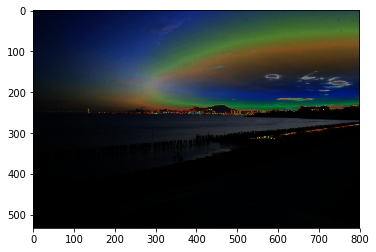

In [10]:
dst = gold_filter(rgb)
plt.imshow(dst)

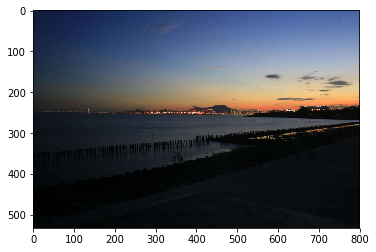

In [6]:
plt.imshow(rgb)